In [1]:
ls /eos/cms/store/group/phys_pps/Phase2/Delphes/PU200/FPMC_WW_14TeV_a0w_0E0_aCw_0E0_noHADR_pt0_WWhadDecays_Delphes_PU200/FPMC_WW_14TeV_a0w_0E0_aCw_0E0_noHADR_pt0_9_WWhadDecays_Delphes_PU200.root

/eos/cms/store/group/phys_pps/Phase2/Delphes/PU200/FPMC_WW_14TeV_a0w_0E0_aCw_0E0_noHADR_pt0_WWhadDecays_Delphes_PU200/FPMC_WW_14TeV_a0w_0E0_aCw_0E0_noHADR_pt0_9_WWhadDecays_Delphes_PU200.root


In [2]:
import uproot4 #trocar o pt0_9
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from ROOT import TLorentzVector

Welcome to JupyROOT 6.30/02


In [3]:
teste=TLorentzVector()
teste.SetPtEtaPhiM(1.0,2.0,3.0,4.0)
print(teste.Pt())
print(teste.Eta())
print(teste.Phi())
print(teste.M())

0.9999999999999999
2.0000000000000004
3.0
3.999999999999999


In [4]:
path='/eos/cms/store/group/phys_pps/Phase2/Delphes/PU200/FPMC_WW_14TeV_a0w_0E0_aCw_0E0_noHADR_pt0_WWhadDecays_Delphes_PU200/'
name='FPMC_WW_14TeV_a0w_0E0_aCw_0E0_noHADR_pt0_9_WWhadDecays_Delphes_PU200.root'


file=path+name
root=uproot4.open(file)

In [5]:
root.keys()

['ProcessID0;1', 'Delphes;1']

In [6]:
tree=root['Delphes']
root['Delphes']
#tree.keys()

<TTree 'Delphes' (58 branches) at 0x7faf3c15e2b0>

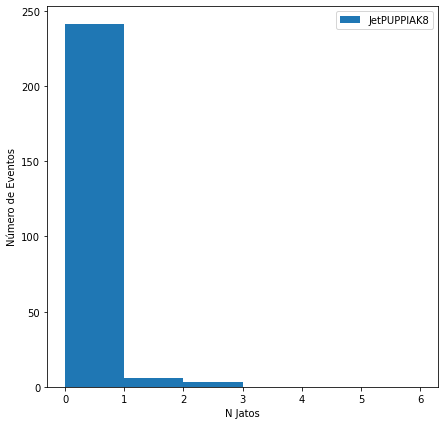

In [7]:
JetPUPPIAK8=tree['JetPUPPIAK8_size'].array()
f,ax = plt.subplots(figsize=(7,7))
plt.hist(JetPUPPIAK8, label='JetPUPPIAK8', bins=6, range=(0,6),alpha=1)
ax.legend(); 
ax.set(xlabel='N Jatos', ylabel='Número de Eventos')
plt.show()

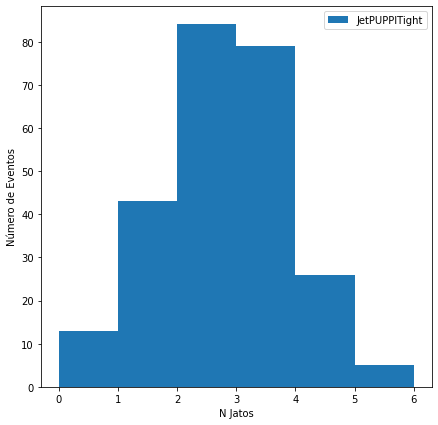

In [8]:
JetPUPPITight=tree['JetPUPPITight_size'].array()
f,ax = plt.subplots(figsize=(7,7))
plt.hist(JetPUPPITight, label='JetPUPPITight', bins=6, range=(0,6),alpha=1)
ax.legend(); 
ax.set(xlabel='N Jatos', ylabel='Número de Eventos')
plt.show()

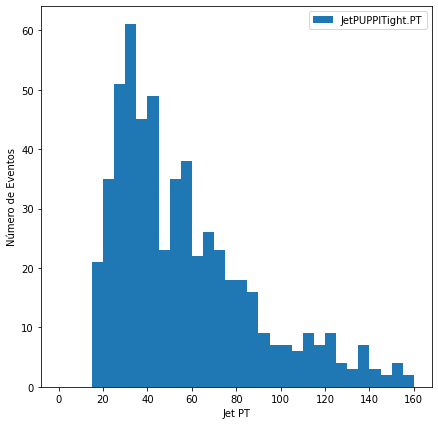

In [9]:
#PT:

JetPUPPITight_PT=tree['JetPUPPITight.PT'].array()
f,ax = plt.subplots(figsize=(7,7))
plt.hist(ak.flatten(JetPUPPITight_PT), bins=32, range=(0, 160),label='JetPUPPITight.PT',alpha=1)
ax.legend(); 
ax.set(xlabel='Jet PT', ylabel='Número de Eventos')
plt.show()


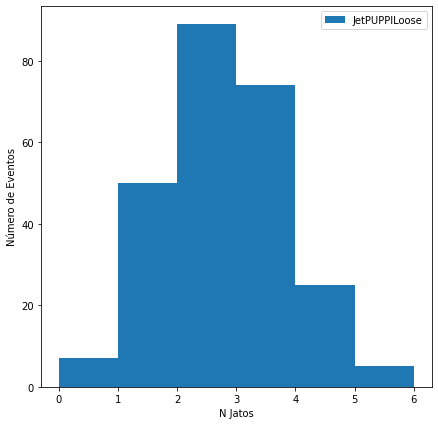

In [10]:
JetPUPPILoose=tree['JetPUPPILoose_size'].array()
f,ax = plt.subplots(figsize=(7,7))
plt.hist(JetPUPPILoose, label='JetPUPPILoose', bins=6, range=(0,6),alpha=1)
ax.legend(); 
ax.set(xlabel='N Jatos', ylabel='Número de Eventos')
plt.show()

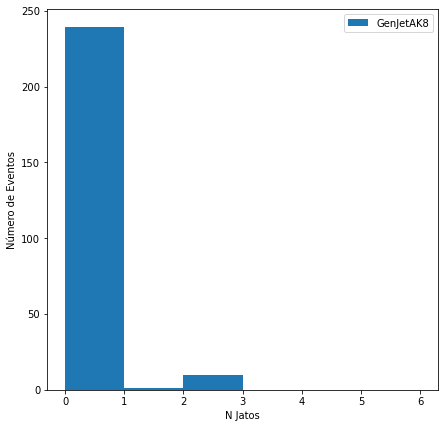

In [11]:
GenJetAK8=tree['GenJetAK8_size'].array()
f,ax = plt.subplots(figsize=(7,7))
plt.hist(GenJetAK8, label='GenJetAK8', bins=6, range=(0,6),alpha=1)
ax.legend(); 
ax.set(xlabel='N Jatos', ylabel='Número de Eventos')
plt.show()

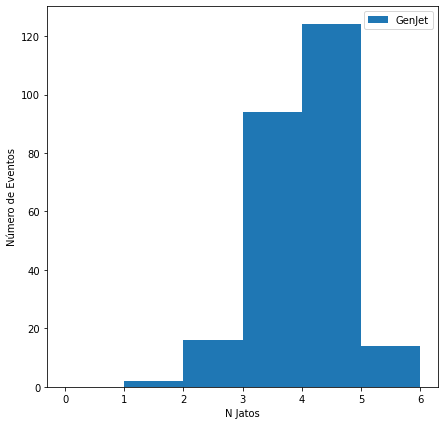

882


In [12]:
GenJet=tree['GenJet_size'].array()
f,ax = plt.subplots(figsize=(7,7))
plt.hist(GenJet, label='GenJet', bins=6, range=(0,6),alpha=1)
ax.legend(); 
ax.set(xlabel='N Jatos', ylabel='Número de Eventos')
plt.show()
print(np.sum(GenJet))


In [13]:
#
vtx_size=tree['Vertex_size'].array()
n_events=len(vtx_size)

#GenJet

GenJet_PT=tree['GenJet.PT'].array() 
GenJet_Eta=tree['GenJet.Eta'].array() 
GenJet_Phi=tree['GenJet.Phi'].array() 
GenJet_Mass=tree['GenJet.Mass'].array()
GenJet_T=tree['GenJet.T'].array()

#JetPUPPITight

JetPUPPITight_PT=tree['JetPUPPITight.PT'].array()
JetPUPPITight_Eta=tree['JetPUPPITight.Eta'].array()
JetPUPPITight_Phi=tree['JetPUPPITight.Phi'].array()
JetPUPPITight_Mass=tree['JetPUPPITight.Mass'].array()
JetPUPPITight_T=tree['JetPUPPITight.T'].array()


In [14]:
JetPUPPITight=tree['JetPUPPITight'].array()
print(len(JetPUPPITight))

250


# Taking all Jet pairs from JetPUPPITight


In [15]:
Tight_Pairs_PT=[]
Tight_Pairs_Eta=[]
Tight_Pairs_Phi=[]
Tight_Pairs_Mass=[]

_temp_PT=[]
_temp_Eta=[]
_temp_Phi=[]
_temp_Mass=[]

Jet_Pairs=[] #Vector to store the TLorentz information of all Jet Pairs for each event: [[[J1,J2],[J1,J2],[J1,J2]],[[J1,J2]...],...]
temp=[] 

for _ev in range(len(JetPUPPITight)):
    
    _temp_PT=[]
    _temp_Eta=[]
    _temp_Phi=[]
    _temp_Mass=[]

    for i in range(JetPUPPITight[_ev]):
        for j in range(i+1,JetPUPPITight[_ev]):
            _temp_PT.append([JetPUPPITight_PT[_ev][i],JetPUPPITight_PT[_ev][j]])
            _temp_Eta.append([JetPUPPITight_Eta[_ev][i],JetPUPPITight_Eta[_ev][j]])
            _temp_Phi.append([JetPUPPITight_Phi[_ev][i],JetPUPPITight_Phi[_ev][j]])
            _temp_Mass.append([JetPUPPITight_Mass[_ev][i],JetPUPPITight_Mass[_ev][j]])
            
    Tight_Pairs_PT.append(_temp_PT)
    Tight_Pairs_Eta.append(_temp_Eta)
    Tight_Pairs_Phi.append(_temp_Phi)
    Tight_Pairs_Mass.append(_temp_Mass)

    

In [16]:
print(len(Tight_Pairs_Mass))

250


In [17]:
##################### HELP #######################

Jet_Pairs_PT=[]
Jet_Pairs_Eta=[]
Jet_Pairs_Phi=[]
Jet_Pairs_Mass=[]
Jet_Pairs_E=[]

TLorentz_Pairs=[]

J1 = TLorentzVector()
J2 = TLorentzVector()

for _ev in range(len(Tight_Pairs_Mass)):
    
    temp_PT=[]
    temp_Eta=[]
    temp_Phi=[]
    temp_Mass=[]
    temp_E=[]
    
    temp_Lorentz=[]
    
    for _pair in range(len(Tight_Pairs_Mass[_ev])):
        
        J1.SetPtEtaPhiM(Tight_Pairs_PT[_ev][_pair][0],Tight_Pairs_Eta[_ev][_pair][0],Tight_Pairs_Phi[_ev][_pair][0],Tight_Pairs_Mass[_ev][_pair][0])
        J2.SetPtEtaPhiM(Tight_Pairs_PT[_ev][_pair][1],Tight_Pairs_Eta[_ev][_pair][1],Tight_Pairs_Phi[_ev][_pair][1],Tight_Pairs_Mass[_ev][_pair][1])
        
        temp_PT.append((J1+J2).M())
        temp_Eta.append((J1+J2).Eta())
        temp_Phi.append((J1+J2).Phi())
        temp_Mass.append((J1+J2).M())
        temp_E.append((J1+J2).E())
             
        temp_Lorentz.append([J1,J2])
        print((temp_Lorentz[_pair][0]+temp_Lorentz[_pair][1]).M())
    
    Jet_Pairs_PT.append(temp_PT)
    Jet_Pairs_Eta.append(temp_Eta)
    Jet_Pairs_Phi.append(temp_Phi)
    Jet_Pairs_Mass.append(temp_Mass)
    Jet_Pairs_E.append(temp_E)
    
    TLorentz_Pairs.append(temp_Lorentz)
    

772.2759149066326
514.242172507178
46.725597642009355
83.25854331247328
232.1101768294969
150.27285687625016
123.21201546250958
148.8612837620755
114.18365265809584
38.6311063468317
227.5119540967048
136.49244842618583
87.2039719587848
178.32119027039195
206.75170969951594
49.323293629638265
307.8297625583376
896.9889810139874
289.6289853414648
311.1948565894169
202.82374337965084
62.92510878956603
430.08465783666867
400.6374559518049
98.17282353359337
195.6337490150361
65.88217487679654
89.51590132494678
407.21368046765417
368.0952757930179
101.55751882771933
298.16143917114016
235.20701386248766
84.2821863756644
209.58968965662763
64.84924866303525
451.803378677227
103.38344291283389
728.5215108040713
242.67100961807824
79.67260665239803
406.5762805236451
265.861451298622
87.35094083287721
173.58341721073646
824.0981080233206
555.0719982462527
86.77483862264417
82.93779338078342
516.5154725662235
346.8317687501155
165.34360621678175
405.44597803382146
97.6912464663117
244.92010809603

In [18]:
for _ev in range(len(TLorentz_Pairs)):
    for _pair in range(len(TLorentz_Pairs[_ev])):
        print((TLorentz_Pairs[_ev][_pair][0]+TLorentz_Pairs[_ev][_pair][1]).M())


365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834

In [19]:
for _ev in range(len(TLorentz_Pairs)):
    for _pair in range(len(TLorentz_Pairs[_ev])):
        print((TLorentz_Pairs[_ev][_pair][0]+TLorentz_Pairs[_ev][_pair][1]).M())

365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834147754
365.24377834

In [20]:
Jet_Pairs_Mass[0]

[772.2759149066326, 514.242172507178, 46.725597642009355]

# Preliminary Results:

In [21]:
n_pairs=0
for _ev in range(len(Jet_Pairs_Mass)):
    n_pairs=n_pairs+len(Jet_Pairs_Mass[_ev])
print('The number of Jet Pairs is:', n_pairs)

The number of Jet Pairs is: 532


In [22]:
#Prepering a vector with the mass to plot more easily:

mass=[]

for _ev in range(len(Jet_Pairs_Mass)):
    for _pair in range(len(Jet_Pairs_Mass[_ev])):
        mass.append(Jet_Pairs_Mass[_ev][_pair])

#print(mass)

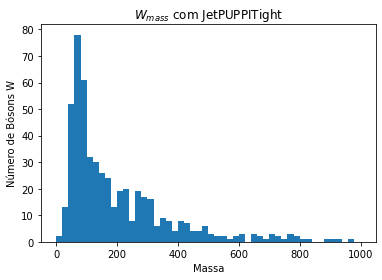

In [23]:
plt.hist(mass, range=(0,1000), bins=50)
plt.ylabel('Número de Bósons W')
plt.xlabel('Massa')
plt.title("$W_{mass}$ com JetPUPPITight")
plt.show()

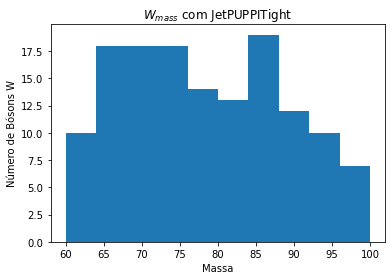

In [24]:
plt.hist(mass, range=(60,100), bins=10)
plt.ylabel('Número de Bósons W')
plt.xlabel('Massa')
plt.title("$W_{mass}$ com JetPUPPITight")
plt.show()

In [25]:
#Defining a window for the W_mass and the real mass:

window=20
real_W_mass=80
pairs_in=[] #pairs inside the window of mass on each event
temp=[]
count_pairs=0

#Counting how many W from PUPPITight are inside the window:
for _ev in range(len(Jet_Pairs_Mass)):
    temp=[]
    for _pair in range(len(Jet_Pairs_Mass[_ev])):
        if Jet_Pairs_Mass[_ev][_pair]<=real_W_mass+window and Jet_Pairs_Mass[_ev][_pair]>=real_W_mass-window:
            temp.append(Jet_Pairs_Mass[_ev][_pair])
            
            count_pairs=count_pairs+1
    pairs_in.append(temp)
        
print('O número de pares de Jatos dentro da janela é:', count_pairs)
#print(pairs_in)

O número de pares de Jatos dentro da janela é: 139


# Preparing to make te PPS cut

In [26]:
convert_nanosec=1e9
zpos=23400
tvertex=40e-12 # time resolution for main vertex:
tpps=30e-12 # time resolution for proton in PPS:

trP=(convert_nanosec)*tpps
trM=(convert_nanosec)*tvertex

VertexT_CMS=(convert_nanosec)*tree['Vertex.T'].array() # converted to nanosec

GenJet_Vz=tree['Vertex.Z'].array()
GenJet_VT=VertexT_CMS+np.random.normal(0,trM,len(VertexT_CMS)) 
 
JetPUPPITight_Vz=tree['Vertex.Z'].array() 
JetPUPPITight_VT=VertexT_CMS+np.random.normal(0,trM,len(VertexT_CMS)) 

# single beam energy:
ebeam=7000.
# collision energy:
ecms=2*ebeam
# xi acceptance from Table 4 on page 40 of https://cds.cern.ch/record/2750358/files/NOTE2020_008.pdf:
_mode='vertical'
xi_min = 0.0147 # using the 234m station
xi_max = 0.196 # using the 196m station
pz_min = (1-xi_max)*ebeam
pz_max = (1-xi_min)*ebeam
# print limiting xi and pz:
pz_min1 =(1-1.08*xi_max)*ebeam
pz_max1 =(1-0.92*xi_min)*ebeam
print('For xi range of (%2.3f,%2.3f) proton pz is in range from %2.2f to %2.2f GeV'%(xi_min,xi_max,pz_min,pz_max))
print(pz_min1)
print(pz_max1)

For xi range of (0.015,0.196) proton pz is in range from 5628.00 to 6897.10 GeV
5518.24
6905.332


# Selecting only protons that pass the PPS acceptance

In [27]:
protons = tree.arrays(['GenProton.Pz','GenProton.Z','GenProton.IsPU','GenProton.T'],  cut="(abs(GenProton.Pz)>%g) & (abs(GenProton.Pz)<%g)"%(pz_min,pz_max))

In [28]:
# setting initial vars:
N_Protons=np.zeros(len(protons)).astype(int) # number of protons in each event that pass the PPS criteria
GenProton_pz=protons['GenProton.Pz']
GenProton_vz=protons['GenProton.Z']
GenProton_ispu=protons['GenProton.IsPU']
GenProton_t=(convert_nanosec)*protons['GenProton.T'] # convert timing to nanosec

# setting vars for elements passing criteria of pz_min and pz_max of protons:
PassPz_Proton_pz=[]
PassPz_Proton_vz=[]
PassPz_Proton_ispu=[]
PassPz_Proton_t=[]
PassPz_Proton_tsmeared=[]
PassPz_Proton_xi=[]
PassPz_Proton_PU=[]

# store sign of proton:
sig=[]

In [29]:
# loop over events in GenProton_pz branch:
for i in tqdm(range(len(GenProton_pz))):
    _pz=GenProton_pz[i]
    _xi=1-np.abs(_pz)/ebeam
    # smear with 2% uncertainty:
    _uncert=0.02
    _xi_smear=_xi*(1+np.random.normal(0,_uncert,len(_xi)))
    _pz_smear=ebeam*(1-_xi_smear)
    _t=np.zeros(len(_pz))
    
    # converting light speed from m/s to cm/ns:
    convert_m_to_cm=1e2
    c=3e8 # why not 299 792 458 m/s ?
    lightspeed=c*convert_m_to_cm/convert_nanosec
    
    # loop over proton pz and store timing:
    for k in range(len(_pz)):
        if _pz[k]>0:
            _t[k]=(GenProton_t[i][k]+(zpos-GenProton_vz[i][k])/lightspeed)
        else: 
            _t[k]=(GenProton_t[i][k]+(zpos+GenProton_vz[i][k])/lightspeed)

    # smear timing around PPS resolution:
    _tsmear=_t+np.random.normal(0,trP,len(_t))
    
    # a counter for protons:
    _Npr=0

    # PassPz :: loop over proton pz and store passing events within smearing:
    # [i] == event
    # [k] == proton in event
    for k in range(len(_pz)):
        if (abs(_pz_smear[k])>pz_min) and (abs(_pz_smear[k])<pz_max):
            sig.append(np.sign(_pz[k])) #Storing the Pz sign of each proton
            PassPz_Proton_pz.append(_pz_smear[k])
            PassPz_Proton_xi.append(_xi_smear[k])
            PassPz_Proton_vz.append(GenProton_vz[i][k])
            PassPz_Proton_PU.append(GenProton_ispu[i][k])
            PassPz_Proton_t.append(_t[k])
            PassPz_Proton_tsmeared.append(_tsmear[k])
            _Npr=_Npr+1
    
    # count number of protons passing PPS criteria after the smearing
    N_Protons[i]=_Npr

100%|██████████| 250/250 [00:03<00:00, 67.51it/s]


Checking how many protons pass the PPS criteria:

The total number of protons that passed the criteria is 2585


(array([ 2.,  4., 19., 21., 53., 68., 25., 37., 11.,  9.]),
 array([ 1. ,  2.7,  4.4,  6.1,  7.8,  9.5, 11.2, 12.9, 14.6, 16.3, 18. ]),
 <BarContainer object of 10 artists>)

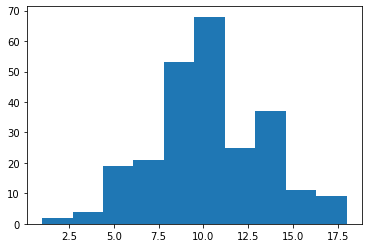

In [30]:
print('The total number of protons that passed the criteria is', np.sum(N_Protons))
plt.hist(N_Protons, bins=10, range=(1,18))
#for i in range(len(N_Protons)):
 #   print(N_Protons[i])

Sorting Protons by Direction

In [31]:
# prep store for proton sign and pairs:
ProtonsNeg = np.zeros(n_events)
ProtonsPos = np.zeros(n_events)
N_Pairs = np.zeros(n_events) # possible combinations for 2 protons on both sectors
###nprot = np.zeros(n_events) # can be removed?

# simple counter:
_count=0

# loop over protons that passed the PassPz criteria:
# ev == event (first index)
# nprotons == secondary index to loop over protons in event (ev)
for ev,_nprotons in tqdm(enumerate(N_Protons)):
    # check sign:
    for i in range(_nprotons):
        if (sig[_count+i]>0):
            ProtonsPos[ev] = ProtonsPos[ev]+1
        else:
            ProtonsNeg[ev] = ProtonsNeg[ev]+1
        N_Pairs = ProtonsPos*ProtonsNeg
    _count = _count + _nprotons

250it [00:00, 44303.53it/s]


# Checking events with 2 Jet Pairs and 2 Protons in PPS:

In [32]:
#Counting how many events we have with at least two pairs of Jets inside the window AND two protons in PPS:

valid_events_PT=[]
valid_events_Eta=[]
valid_events_Phi=[]
valid_events_Mass=[]
valid_events_E=[]


count_no=0 #counting how many pairs of jets in each events
count_yes=0

for _ev in range(len(Jet_Pairs_Mass)):
    
    temp_PT=[] #vector to store which are the events with two pairs of Jets
    temp_Eta=[]
    temp_Phi=[]
    temp_Mass=[]
    
    for _pair in range(len(Jet_Pairs_Mass[_ev])):
        if Jet_Pairs_Mass[_ev][_pair]>=2 and (ProtonsPos[_ev]>0) and (ProtonsNeg[_ev]>0):
            
            temp_PT.append(Jet_Pairs_PT[_ev][_pair])
            temp_Eta.append(Jet_Pairs_Eta[_ev][_pair])
            temp_Phi.append(Jet_Pairs_Phi[_ev][_pair])
            temp_Mass.append(Jet_Pairs_Mass[_ev][_pair])
            temp_E.append(Jet_Pairs_E[_ev][_pair])
                      
    valid_events_PT.append(temp_PT)
    valid_events_Eta.append(temp_Eta)
    valid_events_Phi.append(temp_Phi)
    valid_events_Mass.append(temp_Mass)
    valid_events_E.append(temp_E)
        
#print((valid_events_Mass))



In [33]:
count=0

for _ev in range(len(valid_events_Mass)):
    if len(valid_events_Mass[_ev])==0:
        count=count+1
    
print(count)

print('The number of events with 2 Jet Pairs and 2 Protons in PPS is:', (len(Jet_Pairs_Mass)-count))

57
The number of events with 2 Jet Pairs and 2 Protons in PPS is: 193


Checking how many of those events have Jet Pairs inside the Boson W mass window:

In [34]:
mass_window=20
w_real_mass=80

Pairs_in_PT=[]
Pairs_in_Eta=[]
Pairs_in_Phi=[]
Pairs_in_Mass=[]
Pairs_in_E=[]

for _ev in range(len(valid_events_Mass)):
    
    temp_PT=[] 
    temp_Eta=[]
    temp_Phi=[]
    temp_Mass=[]
    temp_E=[]
    
    for _pair in range(len(valid_events_Mass[_ev])):
        if (valid_events_Mass[_ev][_pair]>=w_real_mass-mass_window) and (valid_events_Mass[_ev][_pair]<=w_real_mass+mass_window):
            
            temp_PT.append(valid_events_PT[_ev][_pair])
            temp_Eta.append(valid_events_Eta[_ev][_pair])
            temp_Phi.append(valid_events_Phi[_ev][_pair])
            temp_Mass.append(valid_events_Mass[_ev][_pair])
            temp_E.append(valid_events_E[_ev][_pair])
            
    Pairs_in_PT.append(temp_PT)
    Pairs_in_Eta.append(temp_Eta)
    Pairs_in_Phi.append(temp_Phi)
    Pairs_in_Mass.append(temp_Mass)
    Pairs_in_E.append(temp_E)


In [35]:
count=0
for _ev in range(len(Pairs_in_Mass)):
    if len(Pairs_in_Mass[_ev])>=2:
        count=count+1
print('The number of events with 2 Jet Pairs inside Mass Window + 2 protons in PPS is:',count)

The number of events with 2 Jet Pairs inside Mass Window + 2 protons in PPS is: 25


# Matching the Boson Candidates with the Protons:

In [36]:
print(Pairs_in_Mass)

[[], [83.25854331247328], [], [], [], [], [87.2039719587848], [], [], [62.92510878956603], [98.17282353359337], [65.88217487679654, 89.51590132494678], [], [84.2821863756644], [64.84924866303525], [79.67260665239803], [87.35094083287721], [86.77483862264417, 82.93779338078342], [], [97.6912464663117], [91.98876662791483, 70.90026865585074], [77.00857454032766], [75.04305091030595], [], [], [84.82625909453472], [], [85.80434860204564], [], [], [], [], [], [68.97199140162719], [91.18723361077916], [], [87.82337883337252], [75.90400203335565], [92.87006108063714], [], [], [72.19345693527258], [83.05223302236998, 90.20567504082231, 60.13151774984506], [], [63.11902502296651], [], [], [], [], [], [66.78746080206425, 86.00526752469379], [], [75.99947588662016], [], [], [82.50392448917144, 69.04891648401647], [], [], [], [79.75391395622889], [63.37352357823119], [], [], [84.38327513901235, 80.49562810158102], [], [90.15936086026029], [95.65874593379992], [79.47687918218674], [], [83.909194291

In [37]:
vector=[3,4,2,0,5,9,1]

minimize=1000000000

for i in range(len(vector)):
    for j in range(i+1,len(vector)):
        
        aux=vector[i]+vector[j]
        
        if aux<minimize:
            
            minimize=aux        
        
print(minimize)


1


In [38]:
ecms=14000
diff=0
aux=0
minimize=1000000000
vetor=[]

X=[]
temp_X=[]

for _ev in range(len(Pairs_in_Mass)):
    if len(Pairs_in[_ev])>2:
        #This is just a loop to get all "pairs" of Jet Pairs. Indexes 'i' and 'j' represent different Jet Pairs
        for i in range(len(Pairs_in_Mass[_ev])):
            for j in range(i+1,len(Pairs_in_Mass[_ev])):
                
                sumE=(Pairs_in_E[_ev][i])+(Pairs_in_E[_ev][j])
                
                PT1=Pairs_in_PT[_ev][i]
                PT2=Pairs_in_PT[_ev][j]

                Pz1=PT1*np.sinh(Jet_Pairs_Eta[_ev][i])
                Pz2=PT2*np.sinh(Jet_Pairs_Eta[_ev][j])

                sumPz=(Pz1+Pz2)

                X1=(1/ecms)*(sumE+sumPz)
                X2=(1/ecms)*(sumE-sumPz)
                                                  
                aux=(X1-(sumE+sumPz)/ecms)**2+(X2-(sumE-sumPz)/ecms)**2
                
                if aux<minimize:
                    
                    minimize=aux
                    
                    temp_X.append([X1,X2])
                    
    X.append(temp_X)
                            
    elif len(Pairs_in_Mass[_ev])==2:
        
        sumE=(Pairs_in_E[_ev][0])+(Pairs_in_E[_ev][1])
                
        PT1=Pairs_in_PT[_ev][0]
        PT2=Pairs_in_PT[_ev][1]

        Pz1=PT1*np.sinh(Jet_Pairs_Eta[_ev][0])
        Pz2=PT2*np.sinh(Jet_Pairs_Eta[_ev][1])

        sumPz=(Pz1+Pz2)

        X1=(1/ecms)*(sumE+sumPz)
        X2=(1/ecms)*(sumE-sumPz)
                
        
                


SyntaxError: invalid syntax (2636906978.py, line 39)